## Projeto Modulo 3 & 4

**DESCRIÇÃO**

Eu, como Gestor de Conteúdo, gostaria de visualizar um ranking categorizado dos filmes, para facilitar a escolha dos usuários.

**REGRAS DE NEGÓCIO**
- Considerar todas as produções  &#x2705;
- Considerar a data de produção de no máximo 10 anos &#x2705; --  &#x2757; &#x2757; Considerando o 'year' como data de produção.
- Levar em consideração as notas  &#x2705;

**CRITÉRIOS DE ACEITE**
- Quero visualizar de 10 em 10 &#x2705;
- Apresentar em lista  &#x2705;
- Constar o Título, Diretor, Atores Principais, Gênero, Ano da Produção, Produtora  &#x2705;
- Limitar os 100 melhores   &#x2705;  --  &#x2757; &#x2757; 100 melhores Geral por nota.
- Categorizar por gênero e tema (Filme, Série ou Documentário)   &#x2705; --  &#x2757; &#x2757; Não se aplica! Não temos essa info no dataset.


#### Bibliotecas

In [ ]:
from tqdm import tqdm, tqdm_notebook
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
from jupyter_datatables import init_datatables_mode
# jupyter nbextension enable jupyter-require/extension


init_datatables_mode()

In [1]:
# Sem as bibliotecas instaladas
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Importando Base de Dados

In [ ]:
# Importando todos os arquivos de uma pasta.

## Windows x Linux
#path = '/home/csvaz/dev/projeto/data'
path = 'C:\DataScience\projeto\data'

for _, _, arquivo in os.walk(path):
    print('Arquivos Disponiveis:')
    print(arquivo)

    
for arq in tqdm_notebook(arquivo, desc= 'Carregando...'):
    name = arq
    name = name.replace('IMDb ', '')
    name = name.replace('.csv', '')
    arq = '{}/{}'.format(path,arq)
       
    globals()['df_' + name] = pd.read_csv(arq)
    print('df_{}'.format(name))  

#### ETL Movies

In [2]:
# Sem as bibliotecas instaladas
df_movies = pd.read_csv('IMDb movies.csv')
df_movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [3]:
#Constar o Título, Diretor, Atores Principais, Gênero, Ano da Produção, Produtora# 
df_etl_movies = df_movies[['title','director', 'actors', 'genre', 'year', 'production_company','avg_vote']]
df_etl_movies = df_etl_movies[df_etl_movies.year > 2010]
df_etl_movies.head()

,title,director,actors,genre,year,production_company,avg_vote
15090,The Other Side of the Wind,Orson Welles,"John Huston, Oja Kodar, Peter Bogdanovich, Sus...",Drama,2018,Royal Road Entertainment,6.9
20324,Mo tai,Hung-Chuen Lau,"Eddie Chan, Yung-Chang Chin, Pak-Kwong Ho, Men...",Horror,2019,Lo Wei Motion Picture Company,6.2
24705,La Telenovela Errante,"Raoul Ruiz, Valeria Sarmiento","Luis Alarcón, Patricia Rivadeneira, Francisco ...","Comedy, Drama, Fantasy",2017,Poetastros,6.6
31606,Joe Finds Grace,Anthony Harrison,"Anthony Harrison, C. Ernst Harth, Ellie Harvie...","Animation, Adventure, Comedy",2017,Bradeway Pictures,8.6
33704,Az ember tragédiája,Marcell Jankovics,"Gyula Balázsi, Péter Benkö, Ágnes Bertalan, Pé...","Animation, Drama, History",2011,Arteam Produkciós Iroda,7.8


In [4]:
df_etl_movies = df_etl_movies.sort_values(by='avg_vote', ascending = False).head(100)
df_genre = df_etl_movies.genre.str.split(expand=True, pat=',')
df_genre = df_genre.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_genre = df_genre[0].append([df_genre[1], df_genre[2]]).unique()

for i in range(df_genre.shape[0]):
    print ('{:2} - {}'.format(i, df_genre[i]))

 0 - Drama
 1 - Comedy
 2 - Romance
 3 - Action
 4 - Crime
 5 - Thriller
 6 - Biography
 7 - Animation
 8 - Family
 9 - Musical
10 - Music
11 - Horror
12 - Mystery
13 - Adventure
14 - Sport
15 - None
16 - History
17 - Sci-Fi
18 - War


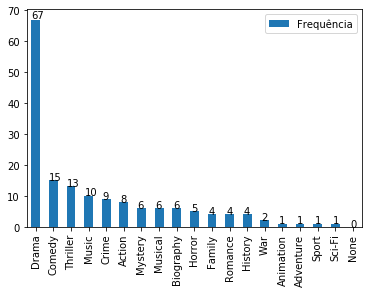

In [5]:
lista = []
for g in df_genre:
    try:
        lista.append(df_etl_movies.genre.str.count(g).sum())
    except:
        lista.append(None)
df = pd.DataFrame(lista, df_genre, columns = ['Frequência'])
df = df.sort_values(by='Frequência', ascending = False  )
ax = df.plot(kind='bar')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

### Resultado 

Funções de Suporte

In [6]:
def define_genre(x):
    if genre in str(x):
        return True
    else:
        return False

In [30]:
# Exibindo os filmes por gênero
genre = input('escolher o gênero do filme: ')

df_etl_movies['validation'] = df_etl_movies['genre'].apply(define_genre)
df_etl_movies_tmp = df_etl_movies[(df_etl_movies.validation == True)]

for i in range(df_etl_movies_tmp.shape[0]//10 + 1):
    
    clear_output(wait=True)
    
    display(df_etl_movies_tmp.iloc[10*(i):10*(i+1),:-1])
    input('Próxima >')

,title,director,actors,genre,year,production_company,avg_vote
74440,Enigma,Harley Wallen,"Dennis Haskins, Bella Shepard, T.J. Storm, Key...","Horror, Mystery, Thriller",2019,Painted Creek Productions,8.8
76375,Kill Bill: The Whole Bloody Affair,Quentin Tarantino,"Uma Thurman, David Carradine, Vivica A. Fox, J...","Action, Crime, Thriller",2011,A Band Apart,8.8
63831,Lost Angelas,William Wayne,"Korrina Rico, William Wayne, Jon Jacobs, David...","Mystery, Thriller",2019,WM Films,8.8


Próxima >
